#Series de Tiempo Financieras

Tomar una ticker, serie de tiempo de rendimientos; sacar predicciones (forecasting) con base en datos históricos.



In [ ]:
!pip install prophet

In [ ]:
!pip install pystan==2.19.1.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.2/16.2 MB 30.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pystan: filename=pystan-2.19.1.1-cp310-cp310-linux_x86_64.whl size=61975943 sha256=58565f8ee5e215177d44f6b0c03ddc1afa9e489334ef5cf14280a7b95304a4d0
  Stored in directory: /root/.cache/pip/wheels/3d/1c/94/4516243362eedbedad15ac4389691ee3bf2d45bec2639c9d8b
Successfully built pystan


In [ ]:
import pandas as pd
from prophet import Prophet

In [ ]:
import pandas as pd
import yfinance as yf

####Descarga de los precios historicos de la acción de Bitcoin desde el 16 de Septiembre del 2014 al 16 de Septiembre del 2023.

In [ ]:
start = "2014-09-16"
end = "2023-09-16"

Bitcoin= yf.download("BTC-USD", start, end)

[*********************100%%**********************]  1 of 1 completed


####Conversión de los datos descargados de Yahoo Finance a un Data Frame

In [ ]:
df=pd.DataFrame(Bitcoin)
df_close= df[["Close"]]

In [ ]:
df_close

,Close
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014
...,...
2023-09-11,25162.654297
2023-09-12,25833.343750
2023-09-13,26228.324219


####Cambio de nombre de las columnas a "ds" y "y" para poder utilizar Prophet

In [ ]:
df_close.reset_index(inplace=True)

In [ ]:
df_close.columns

Index(['Date', 'Close'], dtype='object')

In [ ]:
df_close

,Date,Close
0,2014-09-17,457.334015
1,2014-09-18,424.440002
2,2014-09-19,394.795990
3,2014-09-20,408.903992
4,2014-09-21,398.821014
...,...,...
3281,2023-09-11,25162.654297
3282,2023-09-12,25833.343750
3283,2023-09-13,26228.324219
3284,2023-09-14,26539.673828


In [ ]:
df_close.reset_index(drop=True, inplace=True)
df_close

,Date,Close
0,2014-09-17,457.334015
1,2014-09-18,424.440002
2,2014-09-19,394.795990
3,2014-09-20,408.903992
4,2014-09-21,398.821014
...,...,...
3281,2023-09-11,25162.654297
3282,2023-09-12,25833.343750
3283,2023-09-13,26228.324219
3284,2023-09-14,26539.673828


In [ ]:
cambio_nombres_columnas = ['ds', 'y']
df_close.columns = cambio_nombres_columnas
df_close

,ds,y
0,2014-09-17,457.334015
1,2014-09-18,424.440002
2,2014-09-19,394.795990
3,2014-09-20,408.903992
4,2014-09-21,398.821014
...,...,...
3281,2023-09-11,25162.654297
3282,2023-09-12,25833.343750
3283,2023-09-13,26228.324219
3284,2023-09-14,26539.673828


####Data Frame que estarémos utilizando para el modelo de predicción con Prophet

In [ ]:
display(df_close)

,ds,y
0,2014-09-17,457.334015
1,2014-09-18,424.440002
2,2014-09-19,394.795990
3,2014-09-20,408.903992
4,2014-09-21,398.821014
...,...,...
3281,2023-09-11,25162.654297
3282,2023-09-12,25833.343750
3283,2023-09-13,26228.324219
3284,2023-09-14,26539.673828


####Para ajustar el modelo debemos de solicitar un nuevo objeto Prophet

In [ ]:
modelo = Prophet()

#### Nombramos al método de ajuste e introducimos el marco de datos histórico

In [ ]:
modelo.fit(df_close)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgrd33ivg/t0ie87dp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgrd33ivg/x8dv50z8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57723', 'data', 'file=/tmp/tmpgrd33ivg/t0ie87dp.json', 'init=/tmp/tmpgrd33ivg/x8dv50z8.json', 'output', 'file=/tmp/tmpgrd33ivg/prophet_modelk0_61ey6/prophet_model-20231127015331.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:53:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:53:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


####Las predicciones se llevan a cabo en una columna ds, la cual contiene las fechas especificas sobre las cuales se realizará la predicción. Obtenemos un marco de datos hacia el futuro especificado el número de días por medio del método "Prophet.make_future_dataframe".

In [ ]:
#Predeciendo las fechas dos años en el futuro
futuro = modelo.make_future_dataframe(periods=730)
futuro.tail()

,ds
4011,2025-09-10
4012,2025-09-11
4013,2025-09-12
4014,2025-09-13
4015,2025-09-14


####Por medio del método predecir se asignará a cada fila dentro de dos años en el futuro un valor predicho, el cual se designa "yhat". Debido a que se han descargado fechas históricas se tendrá un ajuste dentro de la muestra. Se mostrará un nuevo marco de datos con una columna yhat la cual contiene la predicción, como también columnas para intervalos de incertidumbre.

In [ ]:
prediccion = modelo.predict(futuro)
prediccion[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
4011,2025-09-10,-8597.334764,-32659.711603,15565.219181
4012,2025-09-11,-8758.736587,-33846.040832,16901.539858
4013,2025-09-12,-8859.532668,-33205.803913,14504.098395
4014,2025-09-13,-8978.820128,-33527.760839,15760.789244
4015,2025-09-14,-9094.708824,-35218.388367,14887.542224


####Graficamos la predicción por medio de "Prophet.plot" y asignandole el data frame de nuestra predicción.

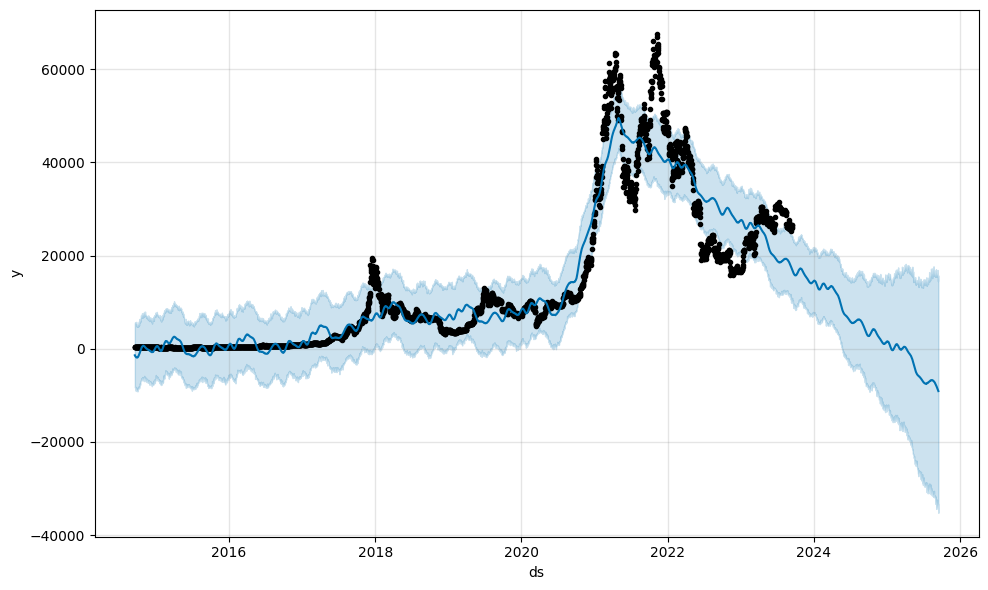

In [ ]:
figura_1 = modelo.plot(prediccion)

####Por medio de ".plot_components" podemos ver los componentes del pronóstico. En estas gráficas podemos observar la tendencia, la estacionalidad anual y la estacionalidad semanal de la serie.

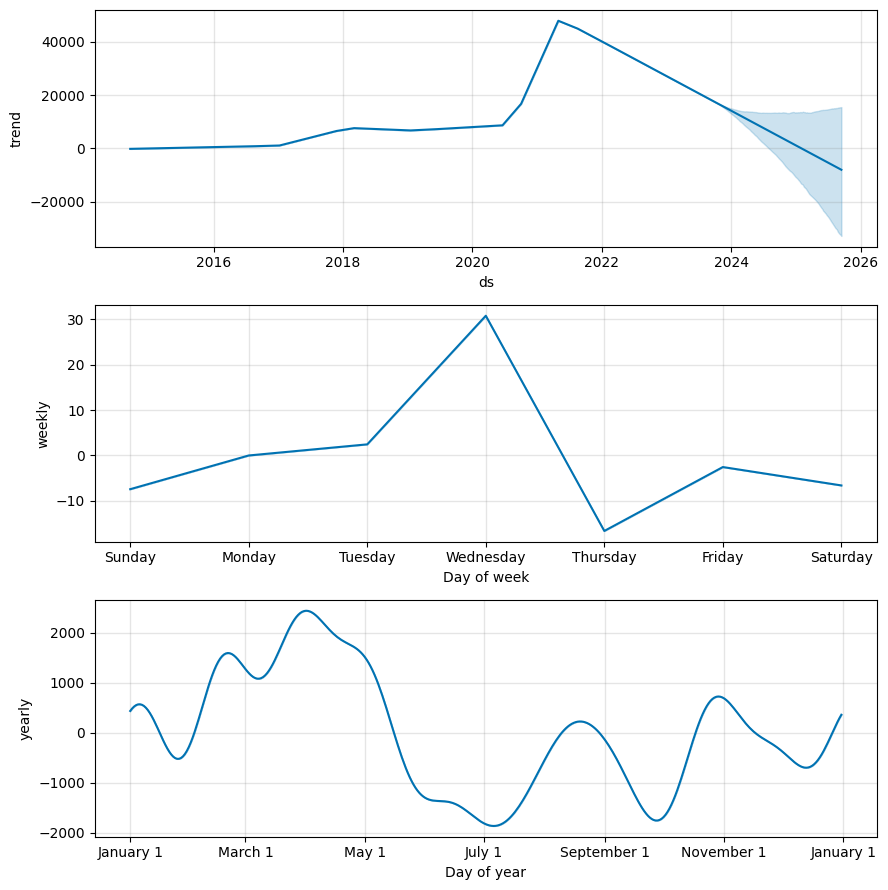

In [ ]:
figura2 = modelo.plot_components(prediccion)